In [13]:
import argparse
import numpy as np
import cv2
from IPython.display import display, Image
import matplotlib.pyplot as plt

There are 6 coins in this original image


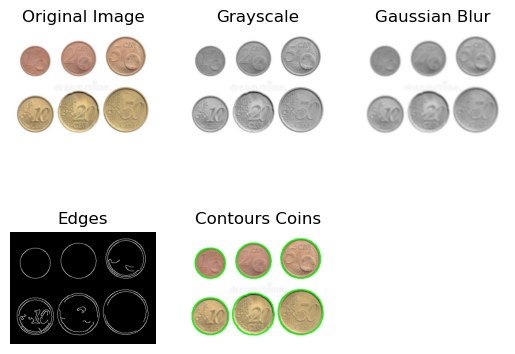

In [14]:
# Read the image from the path
# "imread" : read the image files using file name
image_path = r'C:\Users\ffah\Desktop\Projects\BEng Project\SIIT ML\Robotics Lecture\Robotics_code\week2\Figures\Coins.jpg'
image = cv2.imread(image_path)

# Convert the image to grayscale
# "cvtColor": convert image from one color space(BGR) to another color space(Grey scale)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# GaussianBlur smooths image with Kernel Size = 7x7 to blur the image
blurred = cv2.GaussianBlur(image_gray, (7, 7), 0)

# "Canny" computed canny derivative for edge detection
edged = cv2.Canny(blurred, 30, 150)

# "findContours" computes the object contour from binary image
# from external horizontal, vertical, and diagonal line segments
# Chain-approx-simple used to join the edges together
#cnts= contour = information that we input to the edge image
cnts, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print("There are %d coins in this original image" % (len(cnts)))

# Draw contours on the original image
coins = image.copy()
cv2.drawContours(coins, cnts, -1, (0, 255, 0), 2)

# Display images
images = [image, image_gray, blurred, edged, coins]
titles = ["Original Image", "Grayscale", "Gaussian Blur", "Edges", "Contours Coins"]

for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

plt.show()